<a href="https://colab.research.google.com/github/andresenrique08/ML_2020/blob/master/Reto%202/Reto2_ML_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto 2

Autores:
*   Andrés Enrique Ávila Rojas (201319127)
*   Jeison Alexander Timana Rangel (201617870)

**Regresión Logística - Predicción de lluvia**

In [1]:
# Import libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score # las dos medidas que se van a utilizar pero en diferentes datasets.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


Se toman los datos del repositorio de github con el siguiente link https://github.com/andresenrique08/ML_2020/blob/master/Reto%202/weatherAUS.csv

In [2]:
# Reading file from github
url = "https://raw.githubusercontent.com/andresenrique08/ML_2020/master/Reto%202/weatherAUS.csv"
data  = pd.read_csv(url)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


###Análisis de variables

Este análisis se realiza con el fin de conocer los datos con los que se generará el modelo y posteriormente análizarlos estadísticamente.

Se obtiene el tipo de cada una de las variables

In [3]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

La descripción y el tipo de cada variable se muestra en la siguiente tabla con el fin de entender la naturaleza de las variables y realizar un mejor análisis de los modelos a seleccionar.

Variable                  | Descripción 		|	 Tipo de Variable
  ------------------------| --------------------|-------------------
 Date                     | La fecha de observación                      |     Categorica
Location                  | El nombre de ubicación de la estación                      |    Categorica nominal
MinTemp                   | Temperatura mínima en grados celsius                      |   Númerica
MaxTemp                   | Temperatura máxima en grados celsius                      |   Númerica
Rainfall                  | Cantidad de lluvía del día en mm                     |   Númerica
Evaporation               | Evaporación de clase A (mm) en las 24h a las 9am                      |   Númerica
Sunshine                  | El numero de horas de sol en el día                      |   Númerica
WindGustDir               | Dirección de la ráfaga de viento más alta en 24h a medianoche                      |    Categorica Nominal
WindGustSpeed             | Velocidad de la ráfaga de viento más alta en 24h a medianoche                      |   Númerica
WindDir9am                | Dirección del viento a las 9am                      |    Categorica nominal
WindDir3pm                | Dirección del viento a las 3pm                      |    Categorica nominal
WindSpeed9am              | Velocidad del viento promedio (km/h) en más 10 min antes de las 9am                      |   Númerica
WindSpeed3pm              | Velocidad del viento promedio (km/h) en más 10 min antes de las 3pm                       |   Númerica
Humidity9am               | Humedad (%) a las 9am                      |   Númerica
Humidity3pm               | Humedad (%) a las 3pm                      |   Númerica
Pressure9am               | Presión atmosférica (hpa) reducida al nivel medio del mar a las 9 am                      |   Númerica
Pressure3pm               | Presión atmosférica (hpa) reducida al nivel medio del mar a las 3 pm                      |   Númerica
Cloud9am                  | Fracción del cielo nueblado a las 9am (oktas)                      |   Númerica
Cloud3pm                  | Fracción del cielo nueblado a las 3pm (oktas)                      |   Númerica
Temp9am                   | Tempratura (grados C) a las 9am                      |  Númerica
Temp3pm                   | Tempratura (grados C) a las 3pm                      |   Númerica
RainToday                 | 1 si la precipitación a las 9am es superior a 1mm, 0 de lo contrario                      |    Categorica nominal
RISK_MM                   | Cantidad de lluvia del día siguiente en mm                      |   Númerica
RainTomorrow              | Variable objetivo                      |    Categorica nominal

In [4]:
#Tamaño del dataframe
data.shape

(142193, 24)

#### Análisis Univariado

Se analiza la variable `RainTomorrow`, que es la variable objetivo.

In [5]:
# Se observan los valores únicos de la variable
data.RainTomorrow.unique()

array(['No', 'Yes'], dtype=object)

Se calcula el porcentaje de No y Si en la variable

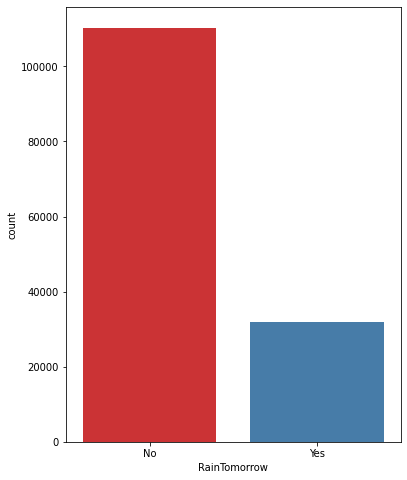

In [6]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=data, palette="Set1")
plt.show()

In [7]:
data['RainTomorrow'].value_counts()/len(data)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

Analisis de la variable:


*   Se tienen 2 valores únicos: Yes y no
*   Se tiene un porcentaje de 77.58% días que no lloverán y un 22.42% en los que si habrá lluvia.



#### Limpieza de datos

Se determina si existen valores perdidos en cada una de las variables

In [8]:
def missing_values_table(df): 
        val_per = df.isnull().sum()
        porcentaje_val_per = 100 * df.isnull().sum()/len(df)
        tabla_val_per = pd.concat([val_per, porcentaje_val_per], axis=1)
        tabla_val_per_ren_columnas = tabla_val_per.rename(
        columns = {0 : 'Valores perdidos', 1 : '% sobre el total'})
        return tabla_val_per_ren_columnas 

In [9]:
missing_values_table(data)

,Valores perdidos,% sobre el total
Date,0,0.000000
Location,0,0.000000
MinTemp,637,0.447983
MaxTemp,322,0.226453
Rainfall,1406,0.988797
Evaporation,60843,42.789026
Sunshine,67816,47.692924
WindGustDir,9330,6.561504
WindGustSpeed,9270,6.519308
WindDir9am,10013,7.041838


Se procede a elimininar todas las variables con un porcentaje de datos perdidos superior al 30%, consideandose un porcentaje alto de pérdidas.

In [10]:
# Se define la función para eliminar las variables del dataframe df con porcentaje p
def eliminar_var(df,p):
    daticos = missing_values_table(df)
    names = list(df.columns)
    for i in range(len(daticos)):
        if daticos.iloc[i,1]>p:
            df.drop(names[i], axis=1, inplace=True)

In [11]:
# Se eliminan las variables con 30% de datos perdidos
eliminar_var(data,30)
# Se muestran las variables que quedan para el análisis y su porcentaje de datos perdidos
missing_values_table(data)

,Valores perdidos,% sobre el total
Date,0,0.000000
Location,0,0.000000
MinTemp,637,0.447983
MaxTemp,322,0.226453
Rainfall,1406,0.988797
WindGustDir,9330,6.561504
WindGustSpeed,9270,6.519308
WindDir9am,10013,7.041838
WindDir3pm,3778,2.656952
WindSpeed9am,1348,0.948007


Se verifica que no filas de datos repetidas

In [12]:
data.duplicated().sum()

0

Se elimina la variable `RISK_MM`, puesto que podría filtrar información al modelo y reducir el porcentaje de acierto en la predicción. Más información en https://www.kaggle.com/jsphyg/weather-dataset-rattle-package. Por otra parte, también se eliminará la variable `location` puesto que la predicción se realizará para cualquier lugar de Australia y no una ubicación en especifico.

In [13]:
data = data.drop(columns=['Location','RISK_MM'],axis=1)

In [14]:
data.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


Se eliminan las filas de las variables perdidas, realizando la limpieza completa de los datos

In [15]:
data=data.dropna(how="any")
missing_values_table(data)

,Valores perdidos,% sobre el total
Date,0,0.0
MinTemp,0,0.0
MaxTemp,0,0.0
Rainfall,0,0.0
WindGustDir,0,0.0
WindGustSpeed,0,0.0
WindDir9am,0,0.0
WindDir3pm,0,0.0
WindSpeed9am,0,0.0
WindSpeed3pm,0,0.0


Se observa que el dataframe ya no tiene valores perdidos, ahora se procede a verificar su tamaño

In [16]:
data.shape

(112925, 18)

#### Análisis de variables categoricas






Teniendo en cuenta que las variables categoricas no pueden ser estandarizadas númericamente, se presenta un resumen de las variables de este tipo que aún están dentro de los datos de interes para este analisis, esto es resumido en la siguiente tabla.

Variable                  | Descripción 		|	 Tipo de Variable
  ------------------------| --------------------|-------------------
 Date                     | La fecha de observación                      |     Categorica
WindGustDir               | Dirección de la ráfaga de viento más alta en 24h a medianoche                      |    Categorica Nominal
WindDir9am                | Dirección del viento a las 9am                      |    Categorica nominal
WindDir3pm                | Dirección del viento a las 3pm                      |    Categorica nominal
RainToday                 | 1 si la precipitación a las 9am es superior a 1mm, 0 de lo contrario                      |    Categorica nominal
RainTomorrow              | Variable objetivo                      |    Categorica nominal

Ahora, con el fin de obtener un mejor manejo de la variable `date` se pondrá el mes y el día en una nueva variable, puesto que el año no es relevante para el análisis, ya que las temporadas se repiten por meses y días.

In [17]:
# Se transforma el formato de la fecha
data['Date'] = pd.to_datetime(data['Date'])
# Se extra el mes en una nueva columna
data['Month'] = data['Date'].dt.month
# Se extrae el día en una nueva columna
data['Day'] = data['Date'].dt.day

Se elimina la columna de fecha, que está dividida y guarda en dos columnas adiciones: `Month` y `Day`.

In [18]:
data.drop('Date', axis=1, inplace = True)
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,12,1
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,12,2
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,12,3
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,12,4
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,12,5


Con la transformación de la variable `Date` y su eliminación, el dataframe solo tiene las siguientes variables categoricas:

Variable                  | Descripción 		|	 Tipo de Variable
  ------------------------| --------------------|-------------------
WindGustDir               | Dirección de la ráfaga de viento más alta en 24h a medianoche                      |    Categorica Nominal
WindDir9am                | Dirección del viento a las 9am                      |    Categorica nominal
WindDir3pm                | Dirección del viento a las 3pm                      |    Categorica nominal
RainToday                 | 1 si la precipitación a las 9am es superior a 1mm, 0 de lo contrario                      |    Categorica nominal
RainTomorrow              | Variable objetivo                      |    Categorica nominal

#### Análisis Multivariable

Se definen las correlaciones de los datos númericos para así obtener un mapa de correlación

In [19]:
correlacion = data.corr()

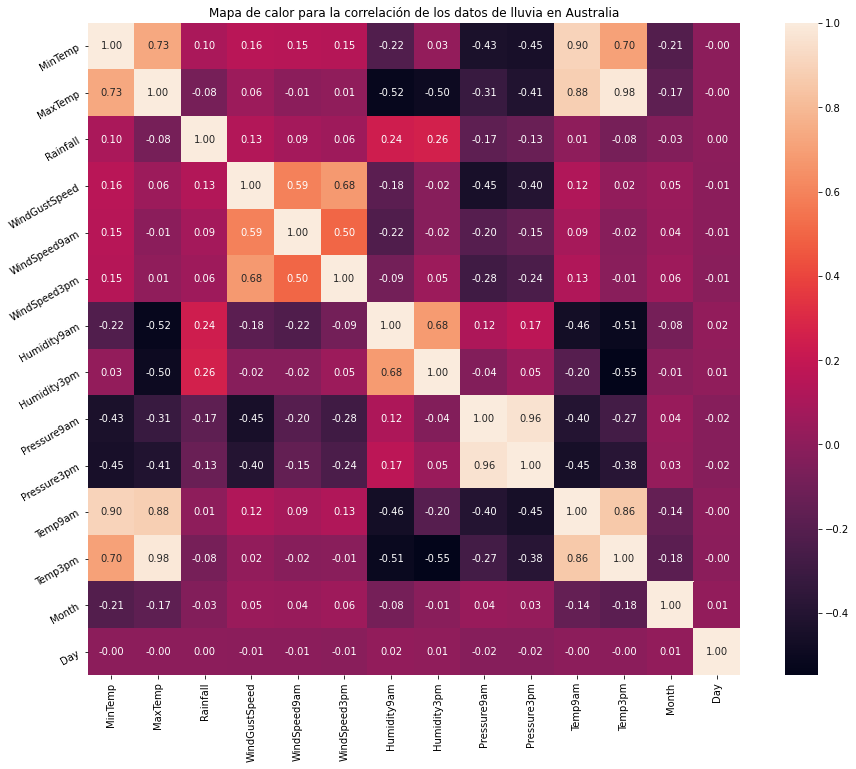

In [20]:
plt.figure(figsize=(16,12))
plt.title('Mapa de calor para la correlación de los datos de lluvia en Australia')
ax = sns.heatmap(correlacion, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

Se evidencian altas correlaciones entre las siguientes variables:


*   `MinTemp` y `MaxTemp`
*   `MinTemp` y `Temp3pm`
*   `MinTemp` y `Temp9am`
*   `MaxTemp` y `Temp9am`
*   `MaxTemp` y `Temp3pm`
*   `WindGustSpeed` y `WindSpeed3pm`
*   `Pressure9am` y `Pressure3pm`
*   `Temp9am` y `Temp3pm`



### Transformación de variables categoricas dentro del dataframe

Teniendo en cuenta las variables categoricas ya identificadas, se procede a cambiar su tipo para el análisis. Para esto se realiza la conversión de tipo categoricas a númericas, de la siguiente manera

In [21]:
# Los datos con 2 categorias unicas, si o no. El sí se reemplaza por 1 y el no por 0.
data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [22]:
data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [23]:
data['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [24]:
data['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'SSW', 'N', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [25]:
data['WindGustDir'] = data['WindGustDir'].astype('category')
data['WindDir3pm'] = data['WindDir3pm'].astype('category')
data['WindDir9am'] = data['WindDir9am'].astype('category')
data.dtypes


MinTemp           float64
MaxTemp           float64
Rainfall          float64
WindGustDir      category
WindGustSpeed     float64
WindDir9am       category
WindDir3pm       category
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Pressure9am       float64
Pressure3pm       float64
Temp9am           float64
Temp3pm           float64
RainToday           int64
RainTomorrow        int64
Month               int64
Day                 int64
dtype: object

In [26]:
data["WindGustDir"] = data["WindGustDir"].cat.codes
data["WindDir3pm"] = data["WindDir3pm"].cat.codes
data["WindDir9am"] = data["WindDir9am"].cat.codes
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,12,1
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,12,2
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,12,3
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,12,4
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,12,5


Se miran las estadísticas de cada variable

In [27]:
data.describe()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
count,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000
mean,12.664721,23.655670,2.377892,7.720655,40.786611,7.237618,7.759478,15.179163,19.500545,67.404162,50.669055,1017.425847,1015.048962,17.462008,22.127306,0.224654,0.221554,6.431499,15.714678
std,6.254135,6.982702,8.602968,4.673142,13.321774,4.550401,4.615792,8.344304,8.580097,18.911610,20.768550,7.032654,6.957822,6.355045,6.837380,0.417356,0.415294,3.476314,8.790323
min,-8.200000,2.600000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,-3.100000,1.700000,0.000000,0.000000,1.000000,1.000000
25%,8.100000,18.300000,0.000000,3.000000,31.000000,3.000000,4.000000,9.000000,13.000000,56.000000,36.000000,1012.800000,1010.300000,12.700000,16.900000,0.000000,0.000000,3.000000,8.000000
50%,12.400000,23.100000,0.000000,8.000000,39.000000,7.000000,8.000000,13.000000,19.000000,68.000000,51.000000,1017.400000,1015.000000,17.100000,21.600000,0.000000,0.000000,6.000000,16.000000
75%,17.200000,28.700000,0.800000,12.000000,48.000000,11.000000,12.000000,20.000000,24.000000,81.000000,65.000000,1022.100000,1019.700000,22.000000,26.900000,0.000000,0.000000,9.000000,23.000000
max,33.900000,48.100000,367.600000,15.000000,135.000000,15.000000,15.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000,1.000000,12.000000,31.000000


###Estandarización de variables

Se crea un dataset con las variables no categoricas para realizar la estandarización y conocer la influencia de cada varible sobre la variable de interés, que en este caso es `RainTomorrow`

In [28]:
# Se usa el minmaxscaler
scaler = MinMaxScaler()
data_estandar = pd.DataFrame(scaler.fit_transform(data), columns = data.columns) 
data_estandar.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,0.513064,0.446154,0.001632,0.866667,0.289062,0.866667,0.933333,0.211765,0.258824,0.71,0.22,0.449587,0.4800,0.461894,0.446667,0.0,0.0,1.0,0.000000
1,0.370546,0.494505,0.000000,0.933333,0.289062,0.400000,1.000000,0.023529,0.235294,0.44,0.25,0.497521,0.4912,0.468822,0.502222,0.0,0.0,1.0,0.033333
2,0.501188,0.507692,0.000000,1.000000,0.304688,0.866667,1.000000,0.200000,0.282353,0.38,0.30,0.447934,0.5056,0.556582,0.477778,0.0,0.0,1.0,0.066667
3,0.413302,0.558242,0.000000,0.266667,0.132812,0.600000,0.000000,0.105882,0.082353,0.45,0.16,0.613223,0.5712,0.489607,0.551111,0.0,0.0,1.0,0.100000
4,0.610451,0.652747,0.002720,0.866667,0.265625,0.066667,0.466667,0.058824,0.211765,0.82,0.33,0.500826,0.4624,0.482679,0.622222,0.0,0.0,1.0,0.133333


In [29]:
data_estandar.describe()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
count,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000
mean,0.495599,0.462762,0.006469,0.514710,0.263958,0.482508,0.517299,0.155049,0.205889,0.674042,0.506691,0.610345,0.607183,0.474873,0.453940,0.224654,0.221554,0.493773,0.490489
std,0.148554,0.153466,0.023403,0.311543,0.104076,0.303360,0.307719,0.098168,0.100942,0.189116,0.207685,0.116242,0.111325,0.146768,0.151942,0.417356,0.415294,0.316029,0.293011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387173,0.345055,0.000000,0.200000,0.187500,0.200000,0.266667,0.082353,0.129412,0.560000,0.360000,0.533884,0.531200,0.364896,0.337778,0.000000,0.000000,0.181818,0.233333
50%,0.489311,0.450549,0.000000,0.533333,0.250000,0.466667,0.533333,0.129412,0.200000,0.680000,0.510000,0.609917,0.606400,0.466513,0.442222,0.000000,0.000000,0.454545,0.500000
75%,0.603325,0.573626,0.002176,0.800000,0.320312,0.733333,0.800000,0.211765,0.258824,0.810000,0.650000,0.687603,0.681600,0.579677,0.560000,0.000000,0.000000,0.727273,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Selección del modelo 

Se analiza la correlación de las variables respecto a la variable de interés `RainTomorrow`

In [30]:
data_estandar[data_estandar.columns[1:]].corr()['RainTomorrow'][:]

MaxTemp         -0.168872
Rainfall         0.238379
WindGustDir      0.051767
WindGustSpeed    0.238664
WindDir9am       0.029832
WindDir3pm       0.026099
WindSpeed9am     0.093173
WindSpeed3pm     0.096277
Humidity9am      0.276704
Humidity3pm      0.455945
Pressure9am     -0.243702
Pressure3pm     -0.224142
Temp9am         -0.035385
Temp3pm         -0.203525
RainToday        0.315359
RainTomorrow     1.000000
Month            0.006124
Day              0.004700
Name: RainTomorrow, dtype: float64

In [31]:
data_estandar[data_estandar.columns[1:]].corr(method="spearman")['RainTomorrow'][:]

MaxTemp         -0.167848
Rainfall         0.337085
WindGustDir      0.050944
WindGustSpeed    0.217441
WindDir9am       0.030297
WindDir3pm       0.025117
WindSpeed9am     0.083600
WindSpeed3pm     0.083290
Humidity9am      0.288081
Humidity3pm      0.440897
Pressure9am     -0.233203
Pressure3pm     -0.213465
Temp9am         -0.040014
Temp3pm         -0.202522
RainToday        0.315359
RainTomorrow     1.000000
Month            0.006399
Day              0.004691
Name: RainTomorrow, dtype: float64

Teniendo en cuenta la correlación de pearson y spearman mostradas previamente, se realiza la selección de estas variables, considerando las variables con correlaciones superiores a una magnitud de 0.15: 

Variables para el modelo seleccionado
----------
MaxTemp         
Rainfall        
WindGustSpeed   
Humidity9am     
Humidity3pm     
Pressure9am     
Pressure3pm     
Temp3pm         
RainToday

In [32]:
# Modelo de variables
modelo = ['MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp3pm','RainToday','RainTomorrow']
X = data_estandar[modelo]
X.head()

,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp3pm,RainToday,RainTomorrow
0,0.446154,0.001632,0.289062,0.71,0.22,0.449587,0.4800,0.446667,0.0,0.0
1,0.494505,0.000000,0.289062,0.44,0.25,0.497521,0.4912,0.502222,0.0,0.0
2,0.507692,0.000000,0.304688,0.38,0.30,0.447934,0.5056,0.477778,0.0,0.0
3,0.558242,0.000000,0.132812,0.45,0.16,0.613223,0.5712,0.551111,0.0,0.0
4,0.652747,0.002720,0.265625,0.82,0.33,0.500826,0.4624,0.622222,0.0,0.0


In [33]:
Y = data_estandar['RainTomorrow']
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: RainTomorrow, dtype: float64

### Separación de datos entre entrenamiento y evaluación

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# Comparación de tamaños
X_train.shape, X_test.shape

((90340, 10), (22585, 10))

### Modelo de entrenamiento

In [35]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Resultados de predicción

In [36]:
# Se ubican los valores obtenidos en un vector
y_pred_test = logreg.predict(X_test)
y_pred_test

array([0., 0., 0., ..., 0., 0., 0.])

Se calcula la probabilidad de lluvia del día siguiente, donde 1 es la probabilidad de que llueva y 0 es que no llueva

In [37]:
# Probabilidad que no llueva
logreg.predict_proba(X_test)[:,0]

array([0.99984149, 0.99980727, 0.99978623, ..., 0.99980956, 0.99982445,
       0.99964817])

In [38]:
# Probabilidad que llueva
logreg.predict_proba(X_test)[:,1]

array([0.00015851, 0.00019273, 0.00021377, ..., 0.00019044, 0.00017555,
       0.00035183])

Se evalua la exactitud del modelo seleccionado

In [40]:
print('Puntaje de exactitud del modelo: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 1.0000


Se observa que hay una exactitud del 100% del modelo, por lo que se concluye que el modelo seleccionado es correcto. Ahora, se evalua si hay un sobre ajuste o un desajuste en los modelos seleccionados

In [41]:
print('Puntaje del conjunto de entrenamiento: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Puntaje del conjunto de prueba: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


### Comparación con un modelo con todas las variables

El modelo seleccionado para comparar y verificar la exactitud del modelo seleccionado, es un modelo que incluye a todas las variables. Estas se toman del dataframe de las variables estandarizadas, como se muestra a continuación:

In [42]:
# La variable data_estandar contiene todos las variables

X2 = data_estandar.drop(['RainTomorrow'], axis=1)
Y2 = data_estandar['RainTomorrow']
X2.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Month,Day
0,0.513064,0.446154,0.001632,0.866667,0.289062,0.866667,0.933333,0.211765,0.258824,0.71,0.22,0.449587,0.4800,0.461894,0.446667,0.0,1.0,0.000000
1,0.370546,0.494505,0.000000,0.933333,0.289062,0.400000,1.000000,0.023529,0.235294,0.44,0.25,0.497521,0.4912,0.468822,0.502222,0.0,1.0,0.033333
2,0.501188,0.507692,0.000000,1.000000,0.304688,0.866667,1.000000,0.200000,0.282353,0.38,0.30,0.447934,0.5056,0.556582,0.477778,0.0,1.0,0.066667
3,0.413302,0.558242,0.000000,0.266667,0.132812,0.600000,0.000000,0.105882,0.082353,0.45,0.16,0.613223,0.5712,0.489607,0.551111,0.0,1.0,0.100000
4,0.610451,0.652747,0.002720,0.866667,0.265625,0.066667,0.466667,0.058824,0.211765,0.82,0.33,0.500826,0.4624,0.482679,0.622222,0.0,1.0,0.133333


Se separan las variables de entrenamiento y de prueba

In [43]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)
# Comparación de tamaños
X_train2.shape, X_test2.shape

((90340, 18), (22585, 18))

Se crea entrena el modelo

In [44]:
logreg2 = LogisticRegression(solver='liblinear', random_state=0)
logreg2.fit(X_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Se realizan pruebas con el modelo

In [45]:
# Se ubican los valores obtenidos en un vector
y_pred_test2 = logreg2.predict(X_test2)
y_pred_test2

array([0., 0., 0., ..., 0., 0., 0.])

Se verifica la exactitud del modelo con todas las variables

In [46]:
print('Puntaje de exactitud del modelo: {0:0.4f}'. format(accuracy_score(y_test2, y_pred_test2)))

Puntaje de exactitud del modelo: 0.8483


Se verifica el sobreajuste o el desajuste de los datos

In [48]:
print('Puntaje del conjunto de entrenamiento: {:.4f}'.format(logreg2.score(X_train2, y_train2)))

print('Puntaje del conjunto de prueba: {:.4f}'.format(logreg2.score(X_test2, y_test2)))

Puntaje del conjunto de entrenamiento: 0.8494
Puntaje del conjunto de prueba: 0.8483


### Conclusiones Finales

Se observa que el modelo seleccionado con las variables con correlación mayor a una magnitud de 0.15 es el mejor modelo que puede ser seleccionado, puesto que dio una exactitud del 100% respecto a la predicción del día, con la muestra de prueba seleccionada. Por otra parte, teniendo en cuenta las correlaciones de las demas variables respecto a la variable de interés, se puede concluir que la variable que afecta en mayor medida la probabilidad de que mañana llueva en Australia es `Humidity3pm`, que corresponde al porcentaje de humedad a las 3pm del día anterior a la predicción, pues que es la variable que presenta mayor correlación.